# Analysis using Diference-in-Differences (DiD) Method

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# Load dataset
car_df = pd.read_csv('/Users/smileloukkade/Downloads/Analysis_china_automobile.csv')
print(car_df.head())

   units_sold  low_price  high_price  year     month   year_date  is_ev_dummy  \
0       69098      316.9       417.9  2022  November  2022-11-01            1   
1       68567       32.8        99.9  2022  November  2022-11-01            1   
2       64145      152.8       216.8  2022  November  2022-11-01            1   
3       31786      214.8       329.8  2022  November  2022-11-01            1   
4       31193      266.7       339.9  2022  November  2022-11-01            1   

   body_type          brand  brand_country  
0        SUV          Tesla  United States  
1  Hatchback  Wuling Motors          China  
2        SUV            BYD          China  
3      Sedan            BYD          China  
4      Sedan          Tesla  United States  


In [62]:
# Check data types
car_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38806 entries, 0 to 38805
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   units_sold     38806 non-null  int64         
 1   low_price      38806 non-null  float64       
 2   high_price     38806 non-null  float64       
 3   year           38806 non-null  int64         
 4   month          38806 non-null  object        
 5   year_date      38806 non-null  object        
 6   is_ev_dummy    38806 non-null  int64         
 7   body_type      36440 non-null  object        
 8   brand          38806 non-null  object        
 9   brand_country  38806 non-null  object        
 10  date           38806 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 3.3+ MB


In [61]:
# Clean and prepare data
car_df['units_sold'] = pd.to_numeric(car_df['units_sold'], errors= 'coerce') #if it found N/A turns it into NaN
car_df['date'] = pd.to_datetime(car_df['year_date'], errors= 'coerce')

car_df.head(5)

,units_sold,low_price,high_price,year,month,year_date,is_ev_dummy,body_type,brand,brand_country,date
0,69098,316.9,417.9,2022,November,2022-11-01,1,SUV,Tesla,United States,2022-11-01
1,68567,32.8,99.9,2022,November,2022-11-01,1,Hatchback,Wuling Motors,China,2022-11-01
2,64145,152.8,216.8,2022,November,2022-11-01,1,SUV,BYD,China,2022-11-01
3,31786,214.8,329.8,2022,November,2022-11-01,1,Sedan,BYD,China,2022-11-01
4,31193,266.7,339.9,2022,November,2022-11-01,1,Sedan,Tesla,United States,2022-11-01


In [35]:
# Check data
print(car_df['units_sold'].describe())
print(car_df[['brand', 'year', 'month', 'units_sold']].head(5))

count    38806.000000
mean      3527.105422
std       5882.556188
min          1.000000
25%        258.000000
50%       1217.000000
75%       4103.000000
max      73009.000000
Name: units_sold, dtype: float64
           brand  year     month  units_sold
0          Tesla  2022  November       69098
1  Wuling Motors  2022  November       68567
2            BYD  2022  November       64145
3            BYD  2022  November       31786
4          Tesla  2022  November       31193


In [72]:
# Create vehicle_type based on is_ev_dummy
car_df['vehicle_type'] = car_df['is_ev_dummy'].apply(lambda x: 'EV' if x == 1 else 'Gasoline')

# Check the result
print(car_df['vehicle_type'].value_counts())
car_df.head(5)


vehicle_type
Gasoline    30278
EV           8528
Name: count, dtype: int64


,units_sold,low_price,high_price,year,month,year_date,is_ev_dummy,body_type,brand,brand_country,date,post_policy,vehicle_type
0,69098,316.9,417.9,2022,November,2022-11-01,1,SUV,Tesla,United States,2022-11-01,1,EV
1,68567,32.8,99.9,2022,November,2022-11-01,1,Hatchback,Wuling Motors,China,2022-11-01,1,EV
2,64145,152.8,216.8,2022,November,2022-11-01,1,SUV,BYD,China,2022-11-01,1,EV
3,31786,214.8,329.8,2022,November,2022-11-01,1,Sedan,BYD,China,2022-11-01,1,EV
4,31193,266.7,339.9,2022,November,2022-11-01,1,Sedan,Tesla,United States,2022-11-01,1,EV


In [78]:
# Create policy dummy (April 2020)
policy_date = pd.to_datetime("2020-04-01")
car_df['post_policy'] = (car_df['date'] >= policy_date).astype(int)
car_df['is_ev_dummy'] = (car_df['vehicle_type'] == "EV").astype(int)

car_df.tail(5)

,units_sold,low_price,high_price,year,month,year_date,is_ev_dummy,body_type,brand,brand_country,date,post_policy,vehicle_type
38801,1,259.8,279.8,2022,October,2022-10-01,1,SUV,Hechuang,China,2022-10-01,1,EV
38802,1,228.9,288.9,2022,October,2022-10-01,0,Sedan,Ford,United States,2022-10-01,1,Gasoline
38803,1,90.8,116.8,2022,October,2022-10-01,0,Sedan,Ford,United States,2022-10-01,1,Gasoline
38804,1,329.9,399.9,2022,October,2022-10-01,1,Sedan,DS,France,2022-10-01,1,EV
38805,1,166.8,192.8,2022,October,2022-10-01,0,NaN,SAIC Group,China,2022-10-01,1,Gasoline


In [24]:
# Aggregate to monthly level
monthly = car_df.groupby(['date', 'vehicle_type'], as_index = False) ['units_sold'].sum()
pivot = monthly.pivot(index = 'date', columns = 'vehicle_type', values = 'units_sold').fillna(0)

monthly.head(10)

,date,vehicle_type,units_sold
0,2018-01-01,EV,24480
1,2018-01-01,Gasoline,2412015
2,2018-02-01,EV,23449
3,2018-02-01,Gasoline,1446230
4,2018-03-01,EV,42745
5,2018-03-01,Gasoline,2101343
6,2018-04-01,EV,51110
7,2018-04-01,Gasoline,1829933
8,2018-05-01,EV,60565
9,2018-05-01,Gasoline,1826780


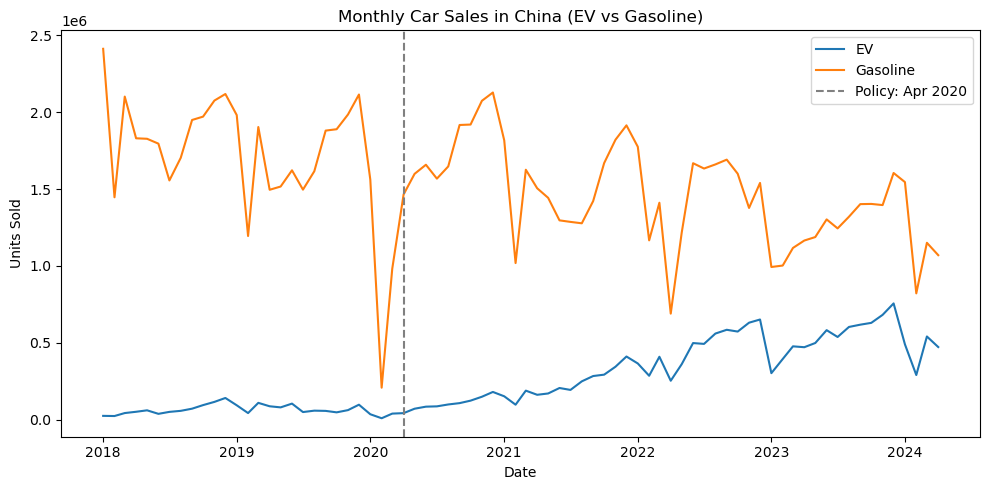

In [36]:
# Plot: Full trend
plt.figure(figsize=(10,5))
plt.plot(pivot.index, pivot['EV'], label='EV')
plt.plot(pivot.index, pivot['Gasoline'], label='Gasoline')
plt.axvline(policy_date, linestyle='--', color='gray', label='Policy: Apr 2020')
plt.title('Monthly Car Sales in China (EV vs Gasoline)')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.tight_layout()
plt.show()

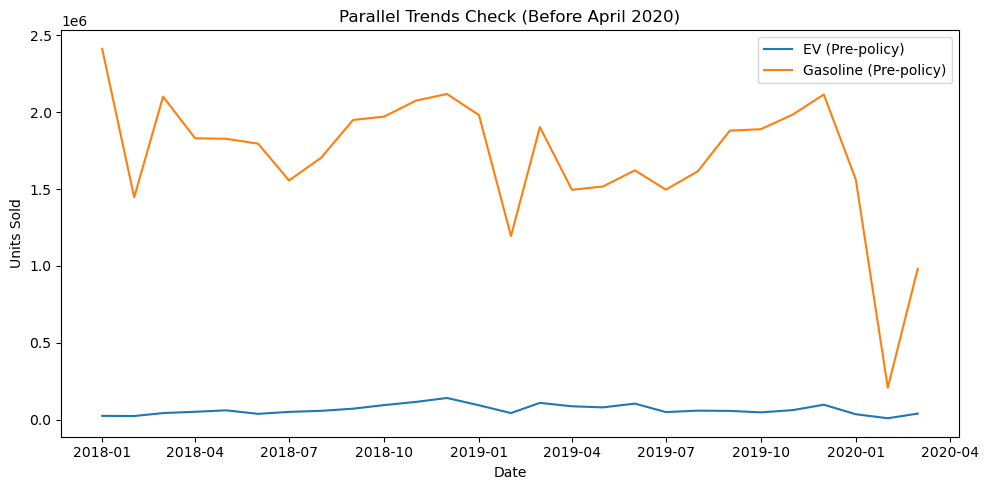

In [37]:
# Plot: Pre-policy parallel trends
pre = pivot[pivot.index < policy_date]
plt.figure(figsize=(10,5))
plt.plot(pre.index, pre['EV'], label='EV (Pre-policy)')
plt.plot(pre.index, pre['Gasoline'], label='Gasoline (Pre-policy)')
plt.title('Parallel Trends Check (Before April 2020)')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
# DiD estimation 
mask_post = pivot.index >= policy_date
ev_pre = pivot.loc[~mask_post, 'EV'].mean()
ev_post = pivot.loc[mask_post, 'EV'].mean()
gas_pre = pivot.loc[~mask_post, 'Gasoline'].mean()
gas_post = pivot.loc[mask_post, 'Gasoline'].mean()

did_effect = (ev_post - ev_pre) - (gas_post - gas_pre)
print(f"Estimated DiD effect: {did_effect:,.0f} additional EV units/month")


Estimated DiD effect: 555,459 additional EV units/month


In [63]:
# DiD Summary Table
# Show the before-after averages clearly 
summary = pd.DataFrame({
    'Group' : ['EV (Treatment)', 'Gasoline (Control)'],
    'Pre-Policy Mean' : [ev_pre, gas_pre],
    'Post-Policy Mean' : [ev_post, gas_post],
    'Change (Post-Pre)' : [ev_post - ev_pre, gas_post - gas_pre]
})

print(summary.round(0))
print("\nEstimated DiD effect: {:,.0f} additional EV units/month".format(did_effect))

                Group  Pre-Policy Mean  Post-Policy Mean  Change (Post-Pre)
0      EV (Treatment)          64422.0          361139.0           296717.0
1  Gasoline (Control)        1712053.0         1453311.0          -258742.0

Estimated DiD effect: 555,459 additional EV units/month


In [40]:
# OLS Coefficient (manual)
panel = monthly.copy()
panel['is_ev'] = (panel['vehicle_type'] == "EV").astype(int)
panel['post'] = (panel['date'] >= policy_date).astype(int)
panel['interaction'] = panel['is_ev'] * panel['post']

X = np.column_stack([np.ones(len(panel)), panel['is_ev'], panel['post'], panel['interaction']])
y = panel['units_sold'].values
beta = np.linalg.lstsq(X, y, rcond=None)[0]

# Define the names for each regression coefficient (to make the output readable)
coef_names = ['Intercept', 'is_ev', 'post', 'is_ev×post (DiD)']
print("\nOLS Coefficients:")


for name, b in zip(coef_names, beta):
    print(f"{name:20s}: {b:,.2f}")


OLS Coefficients:
Intercept           : 1,712,053.37
is_ev               : -1,647,631.78
post                : -258,742.31
is_ev×post (DiD)    : 555,459.23


In [49]:
# Check the result
print(panel.tail(15))

          date vehicle_type  units_sold  is_ev  post  interaction
137 2023-09-01     Gasoline     1401768      0     1            0
138 2023-10-01           EV      629407      1     1            1
139 2023-10-01     Gasoline     1403063      0     1            0
140 2023-11-01           EV      681552      1     1            1
141 2023-11-01     Gasoline     1395581      0     1            0
142 2023-12-01           EV      755943      1     1            1
143 2023-12-01     Gasoline     1604200      0     1            0
144 2024-01-01           EV      489514      1     1            1
145 2024-01-01     Gasoline     1545013      0     1            0
146 2024-02-01           EV      290151      1     1            1
147 2024-02-01     Gasoline      821390      0     1            0
148 2024-03-01           EV      540863      1     1            1
149 2024-03-01     Gasoline     1150255      0     1            0
150 2024-04-01           EV      472122      1     1            1
151 2024-0

In [46]:
# Confirm the effect of DiD
print(panel.groupby(['is_ev','post'])['units_sold'].mean())

is_ev  post
0      0       1.712053e+06
       1       1.453311e+06
1      0       6.442159e+04
       1       3.611385e+05
Name: units_sold, dtype: float64


In [50]:
# Formal statistical version: OLS Regression Results
import statsmodels.formula.api as smf
model = smf.ols('units_sold ~ is_ev + post + is_ev:post', data = panel).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             units_sold   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     283.6
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           3.88e-61
Time:                        03:11:07   Log-Likelihood:                -2119.2
No. Observations:                 152   AIC:                             4246.
Df Residuals:                     148   BIC:                             4258.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.712e+06   5.36e+04     31.970      0.0

# Data Visualization on "Trends"

- Using a `3-month rolling average` to smooth short-term fluctuations, the trend line shows that EV sales remained low and stable before 2020 but accelerated sharply after the April 2020 policy, while gasoline vehicle sales plateaued. This divergence illustrates the sustained impact of the subsidy extension on EV demand

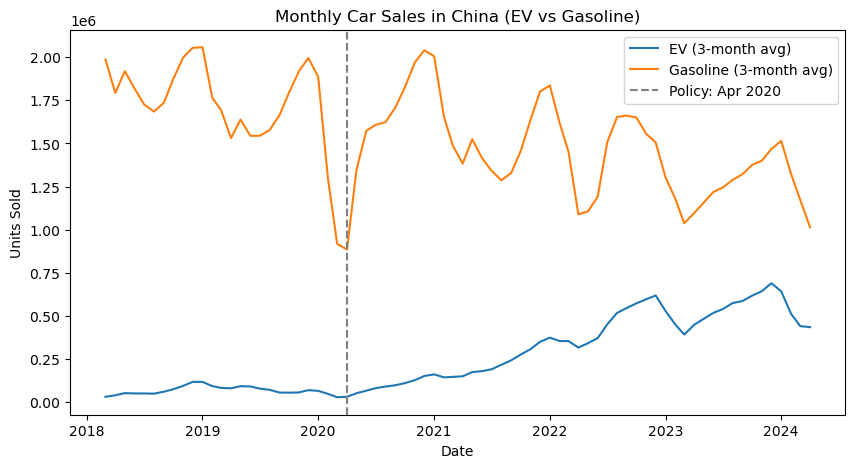

In [54]:
# Smooth the lines using a 3-month rolling average
rolling_pivot = pivot.rolling(3).mean()

plt.figure(figsize=(10, 5))
plt.plot(rolling_pivot.index, rolling_pivot['EV'], label='EV (3-month avg)')
plt.plot(rolling_pivot.index, rolling_pivot['Gasoline'], label='Gasoline (3-month avg)')

# Add a vertical dashed line at the policy date
plt.axvline(policy_date, color='gray', linestyle='--', label='Policy: Apr 2020')

plt.title("Monthly Car Sales in China (EV vs Gasoline)")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.show()



<Axes: xlabel='date'>

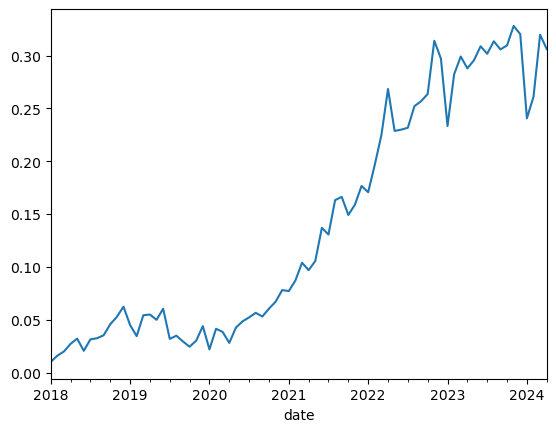

In [53]:
# EV Market Share
pivot['EV_share'] = pivot['EV'] / (pivot['EV'] + pivot['Gasoline'])
pivot['EV_share'].plot()


<Axes: xlabel='date'>

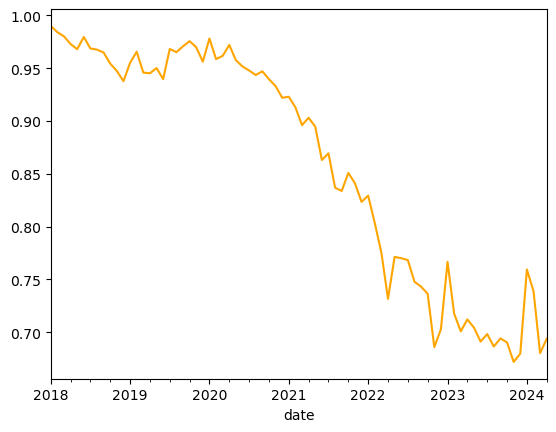

In [68]:
# Gasoline Market Share
pivot['Gasoline_share'] = pivot['Gasoline'] / (pivot['EV'] + pivot['Gasoline'])
pivot['Gasoline_share'].plot(color='orange')

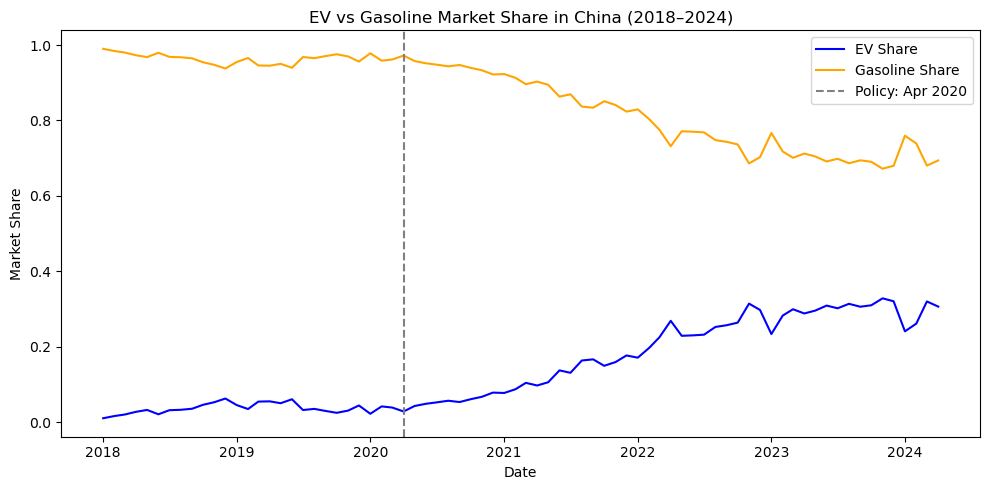

In [67]:
# EV vs Gasoline Market share
plt.figure(figsize=(10,5))
plt.plot(pivot.index, pivot['EV_share'], label='EV Share', color='blue')
plt.plot(pivot.index, pivot['Gasoline_share'], label='Gasoline Share', color='orange')

# Add policy reference line (optional)
plt.axvline(pd.to_datetime('2020-04-01'), color='gray', linestyle='--', label='Policy: Apr 2020')

plt.title("EV vs Gasoline Market Share in China (2018–2024)")
plt.xlabel("Date")
plt.ylabel("Market Share")
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
car_df.tail()

,units_sold,low_price,high_price,year,month,year_date,is_ev_dummy,body_type,brand,brand_country,date
38801,1,259.8,279.8,2022,October,2022-10-01,1,SUV,Hechuang,China,2022-10-01
38802,1,228.9,288.9,2022,October,2022-10-01,0,Sedan,Ford,United States,2022-10-01
38803,1,90.8,116.8,2022,October,2022-10-01,0,Sedan,Ford,United States,2022-10-01
38804,1,329.9,399.9,2022,October,2022-10-01,1,Sedan,DS,France,2022-10-01
38805,1,166.8,192.8,2022,October,2022-10-01,0,NaN,SAIC Group,China,2022-10-01
